
## Loan Application Status Prediction
### Problem Statement:
    This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

    Independent Variables:

    - Loan_ID

    - Gender

    - Married

    - Dependents

    - Education

    - Self_Employed

    - ApplicantIncome

    - CoapplicantIncome

    - Loan_Amount

    - Loan_Amount_Term

    - Credit History

    - Property_Area

    Dependent Variable (Target Variable):

    - Loan_Status

    You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

    


#### DATA PREPARATION:
    - Importing data.
    - checking data for null values and irregularities if any.
    - Understanding Data.

In [840]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [841]:
train = pd.read_csv('loan_prediction.csv')


In [842]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [843]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### OBSERVATIONS:
    - Applicant Income/ Coapplicants/ loan amount mean and 50% quantile and median has high difference, Skewness observed.
    

In [844]:
for i in train.columns:
    print(train[i].value_counts())

LP002036    1
LP002318    1
LP001788    1
LP002368    1
LP002082    1
           ..
LP001002    1
LP002100    1
LP002634    1
LP002187    1
LP002110    1
Name: Loan_ID, Length: 614, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: L

#### OBSERVATIONS: 
    - Gender,Married,Dependants,Education,Self_Employeed,Credit_History, property_Area, are Categorical Features, 7 Categorical Features.
    - Income/ loan Amount,Loan_amount Term are 4 Continous Features.
    
    - Target variable is Categorical , Binary Classification (2 target Labels).
    
    
    - WE can drop ID, as it unique identifier of each row.

In [845]:
train.shape

(614, 13)

<AxesSubplot:>

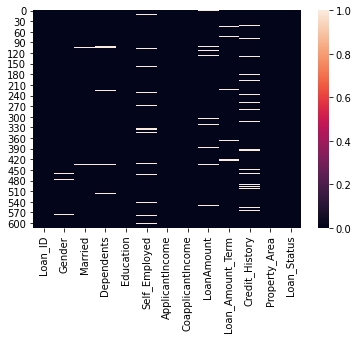

In [846]:
sb.heatmap(train.isnull())

#### OBSERVATIONS:
    -- many missing vlaues present, we can fill it with mode for categorical data and median for continous data.

### EDA: Vizualization of data.

In [847]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [848]:
import warnings
warnings.filterwarnings('ignore')

([<matplotlib.axis.XTick at 0x20fa24ba910>,
 [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

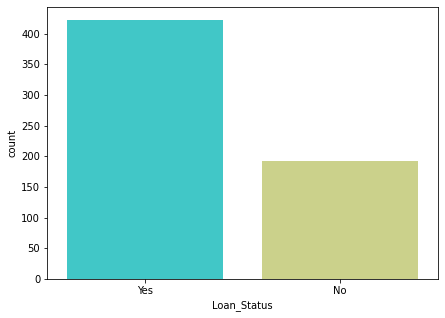

In [849]:
plt.figure(figsize=(7,5))
sb.countplot(train['Loan_Status'],palette='rainbow')
plt.xticks([0,1],['Yes','No'])

### Observations:
    - Imbalanced Classes observed.
    - WE can oversample for EDA Purposes for better vizualiation insights.

In [850]:
from imblearn.over_sampling import RandomOverSampler

In [851]:
rus = RandomOverSampler(random_state=0)

In [852]:
x_over,y_over = rus.fit_resample(train.drop('Loan_Status',axis=1),train['Loan_Status'])

#### VIZUALIZATION OF BALANCED CLASSES AFTER OVERSAMPLING

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

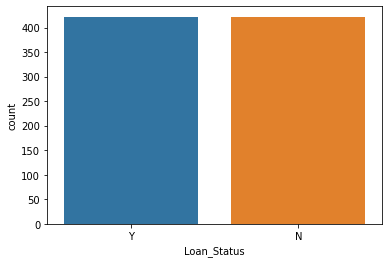

In [853]:
sb.countplot(y_over)

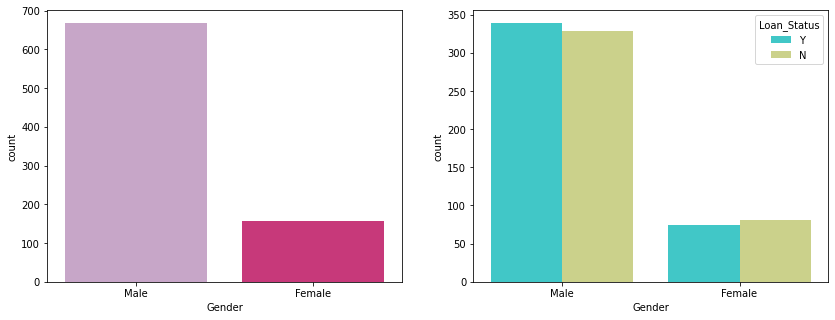

In [854]:

fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.countplot(x_over['Gender'], ax=ax[0],palette='PuRd')
sb.countplot(x_over['Gender'],hue=y_over, ax=ax[1],palette='rainbow')

fig.show()

#### OBSERVATIONS:
    --- Male count is higher than Female.
    ---  Loan_Status has no major effect by gender, as both counts in Loan Status is Approximately same.

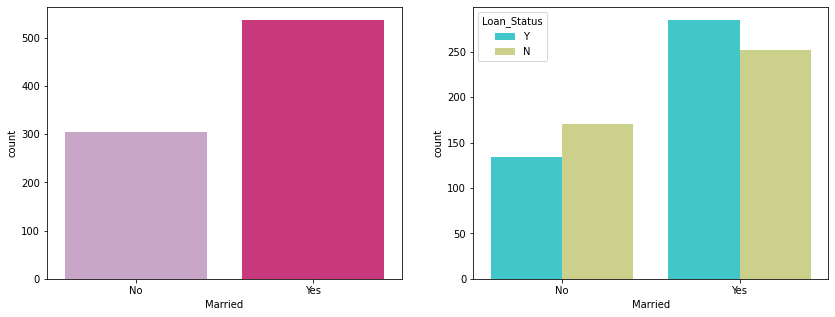

In [855]:

fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.countplot(x_over['Married'], ax=ax[0],palette='PuRd')
sb.countplot(x_over['Married'],hue=y_over, ax=ax[1],palette='rainbow')

fig.show()

#### OBSERVATIONS:
    - MArried Couples applicants are higher than non-Married.
    - Married Applicants have higher probability of Yes Loan_Status, and non Married applicant has higher probability of No Loan _Status

In [856]:
y_num = y_over.apply(lambda x: 1 if x=='Y' else 0 )

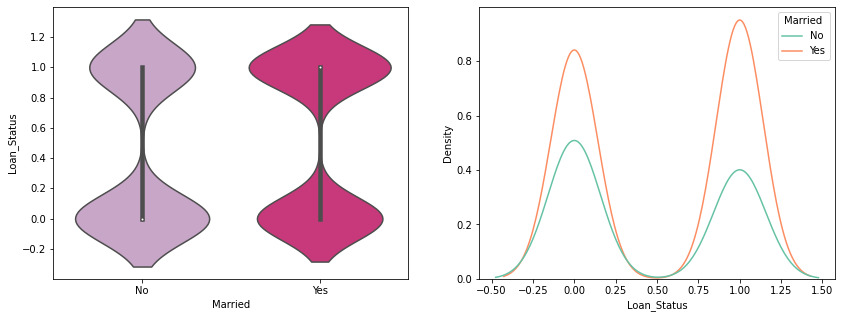

In [857]:

fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.violinplot(x_over['Married'],y_num, ax=ax[0],palette='PuRd')
sb.kdeplot(y_num,hue=x_over['Married'], ax=ax[1],palette='Set2')

fig.show()

#sb.violinplot(x_over['Married'],y_over,)

#### OBSERVATIONS:
    - as WE BAR THE COUNT PLOTS, voilin plot also suggest that married applicants are higher in Loan Status Yes. And Non Married are higher in No .
    
    - Correlation between Married and Loan Status Observed, we can see more in correlation table.

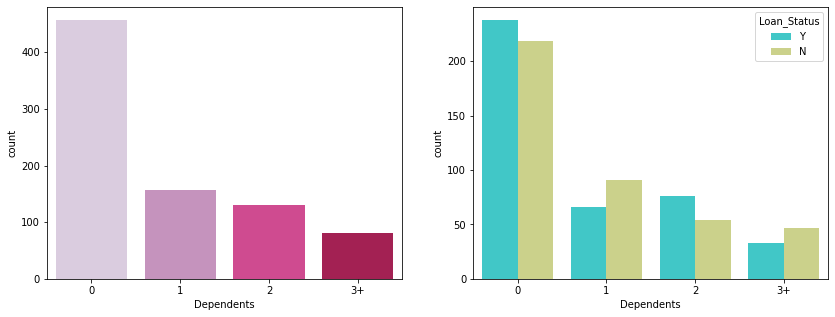

In [858]:

fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.countplot(x_over['Dependents'], ax=ax[0],palette='PuRd')
sb.countplot(x_over['Dependents'],hue=y_over, ax=ax[1],palette='rainbow')

fig.show()

### OBSERVATIONS:
    - most Applicants are with zero Dependants, and  no of dependants 1,2,3  we can combine them in one Gruop as 1+ dependants to get more information from this features. as Dependents YES/ No rather than no of Dependants.
    - AS not not much corelation is seen in no of dependatns as in few categories (Random) probabiltiy of Yes loan is high and in other No loan status probability is high.

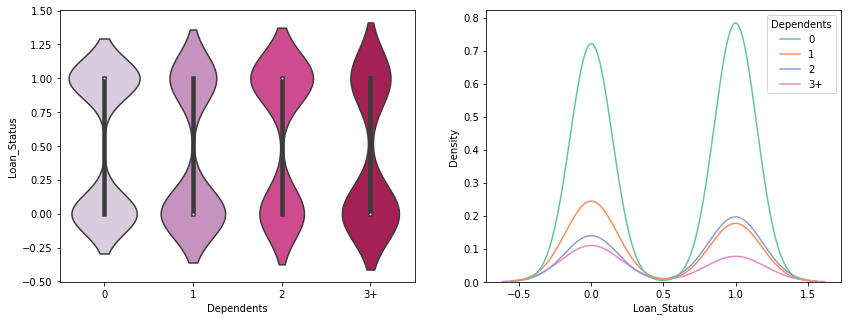

In [859]:

fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.violinplot(x_over['Dependents'],y_num, ax=ax[0],palette='PuRd')
sb.kdeplot(y_num,hue=x_over['Dependents'], ax=ax[1],palette='Set2')

fig.show()

#sb.violinplot(x_over['Married'],y_over,)

#### OBSERVATIONS:
    - As we observe the KdePlot, few category have probability of Yes Loan_Status and Few to No loan_Status, no a regular patter.

**CREATING A NEW FEATURE WITH DEPENDANTS : YES/ No , Clubbing all the categories where dependants are 1,2,3+ as to make the categories balanced and to get more information as present Dependants Features doesnot show much correlation.**

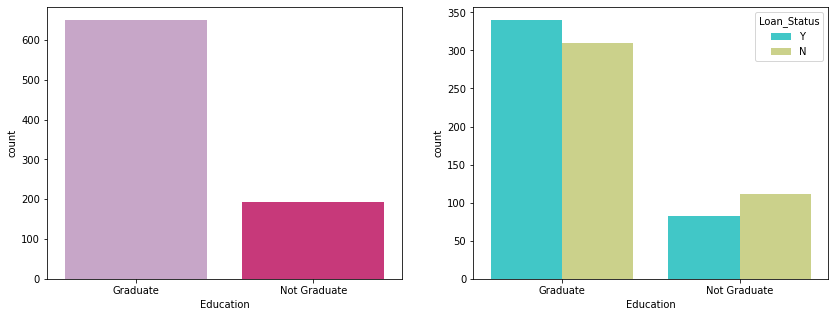

In [860]:
### LOAN STATUS 0 = NO , 1 = YES

fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.countplot(x_over['Education'], ax=ax[0],palette='PuRd')

sb.countplot(x_over['Education'],hue=y_over, ax=ax[1],palette='rainbow')


fig.show()

####  OBSERVATIONS
     - MOSTapplicants with Education with Graduate level.
     - Graduate Education has higher probability with Yes Loan_Status.
     - not Graduate has higher Probability with No Loan_Status.

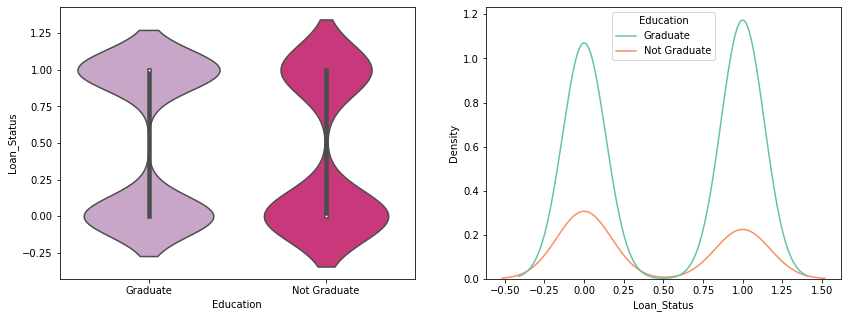

In [861]:

fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.violinplot(x_over['Education'],y_num, ax=ax[0],palette='PuRd')
sb.kdeplot(y_num,hue=x_over['Education'], ax=ax[1],palette='Set2')

fig.show()

#sb.violinplot(x_over['Married'],y_over,)

#### OBSERVATIONS:
    - Graduate count is highin Loan status Yes, and Not Graudate count is higher in Loan Status No.
    - Correlation Observed betweem Eduaction and Loan_Status.

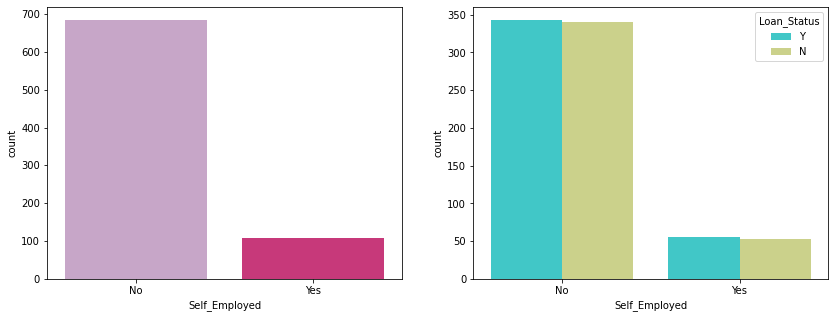

In [862]:

fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.countplot(x_over['Self_Employed'], ax=ax[0],palette='PuRd')
sb.countplot(x_over['Self_Employed'],hue=y_over, ax=ax[1],palette='rainbow')

fig.show()

#### OBSERVATIONS:
    - SELF_EMPLOYED No has higher count of Applicants.
    - Self employed has Same ccount is Yes/ No Loan_Status.
    - No correlation Observed.

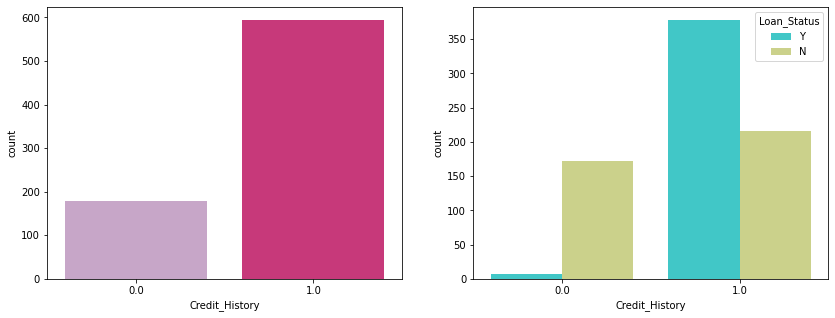

In [863]:

fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.countplot(x_over['Credit_History'], ax=ax[0],palette='PuRd')
sb.countplot(x_over['Credit_History'],hue=y_over, ax=ax[1],palette='rainbow')

fig.show()

#### OBSERVATION:
    - Credit History with 1.0 are higher in applicants.
    - Credit history with 0 has HIGH probability to have No as Loan_Status.
    - HIGH Correlation Seen between Credit History and Loan_history.
    - High Probability with credit Hiatory 1 to belong in Loan _Status 1.0

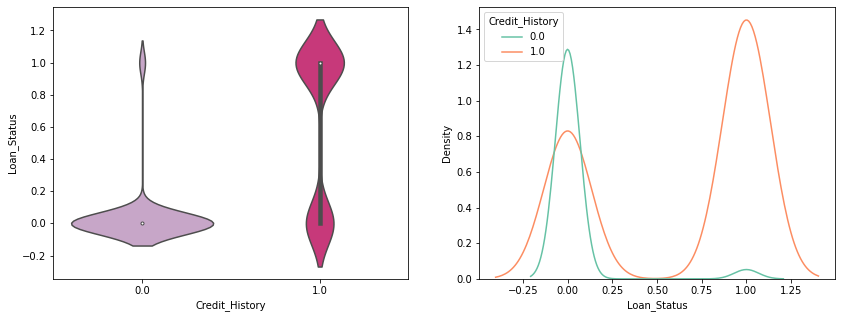

In [864]:

fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.violinplot(x_over['Credit_History'],y_num, ax=ax[0],palette='PuRd')
sb.kdeplot(y_num,hue=x_over['Credit_History'], ax=ax[1],palette='Set2')

fig.show()

#sb.violinplot(x_over['Married'],y_over,)

### OBSERVATIONS:
    - High COrrelation can be observed .
    - Credit History with 0 has more than 95%+ counts in LOAn_Status No.

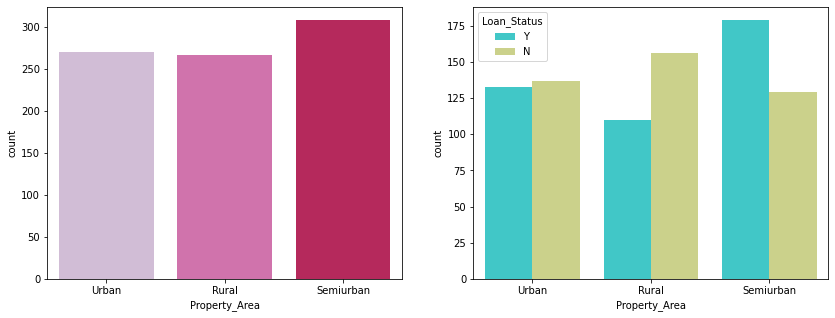

In [865]:

fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.countplot(x_over['Property_Area'], ax=ax[0],palette='PuRd')
sb.countplot(x_over['Property_Area'],hue=y_over, ax=ax[1],palette='rainbow')

fig.show()

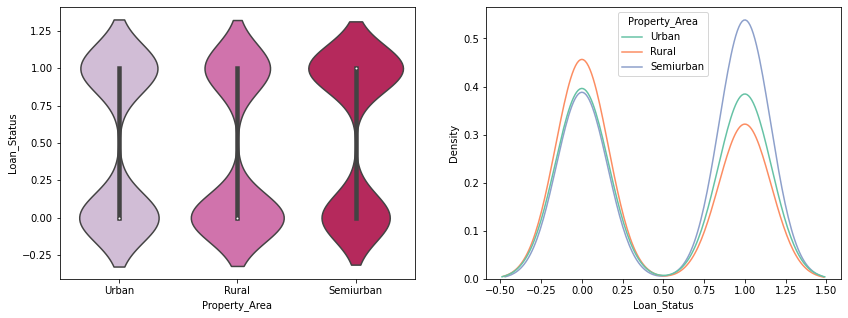

In [866]:

fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.violinplot(x_over['Property_Area'],y_num, ax=ax[0],palette='PuRd')
sb.kdeplot(y_num,hue=x_over['Property_Area'], ax=ax[1],palette='Set2')

fig.show()

#sb.violinplot(x_over['Married'],y_over,)

#### OBSERVATIONS:
    - Semi urban has highest  count with loan_Status Yes with compared to other areas.Probability to belong in Yes loan_Status is High.
    - in No loan_Status , Rural probabilty is higher than other areas.

In [867]:
x_over

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
839,LP001263,Male,Yes,3+,Graduate,No,3167,4000.0,180.0,300.0,0.0,Semiurban
840,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban
841,LP002115,Male,Yes,3+,Not Graduate,No,2647,1587.0,173.0,360.0,1.0,Rural
842,LP002443,Male,Yes,2,Graduate,No,3340,1710.0,150.0,360.0,0.0,Rural


In [868]:
column_cont = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

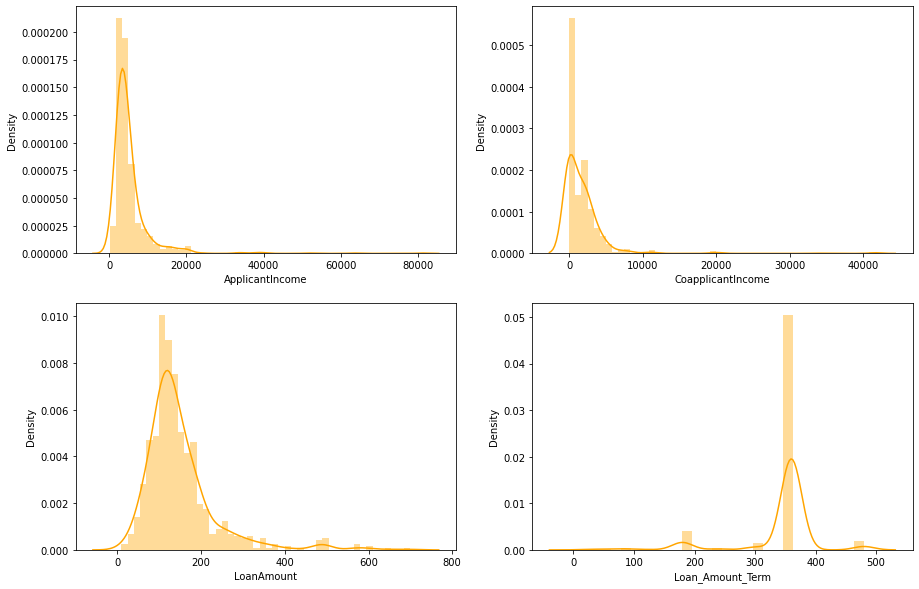

In [869]:
plt.figure(figsize=(15,10))
k =1
for i in column_cont:
    plt.subplot(2,2,k)
    sb.distplot(x_over[i],color='orange')
    k = k+1

#### Skewness obsered in all the continous features.

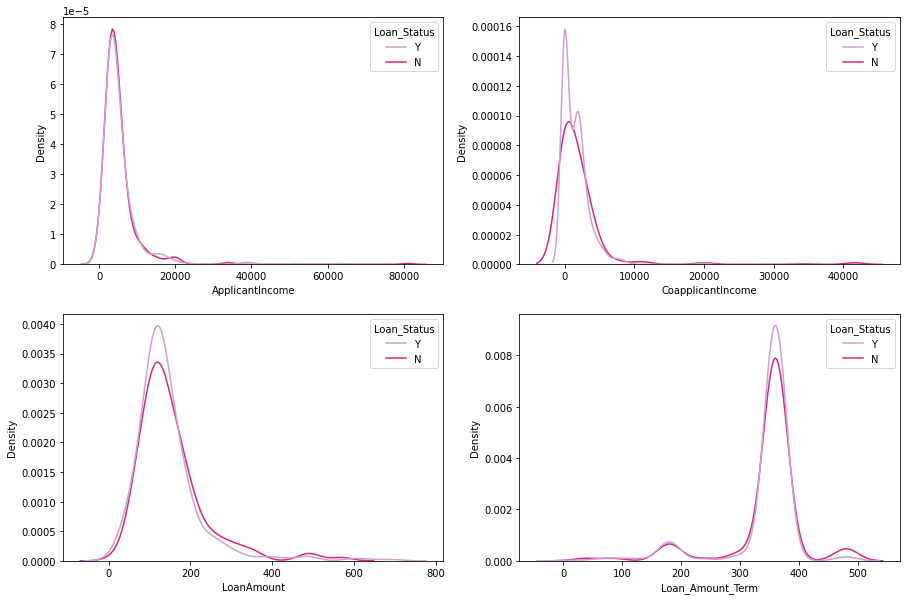

In [870]:
plt.figure(figsize=(15,10))
k =1
for i in column_cont:
    plt.subplot(2,2,k)
    sb.kdeplot(x_over[i],hue= y_over,palette='PuRd' )
    k = k+1

#### OBSERVATIONS:
    - Mean value of loan_amount, loan_Amount term, Coappliant loan amount is lower for No Loan_Status.
    - Applicant loan shows no relevant corelation with Loan_Status.


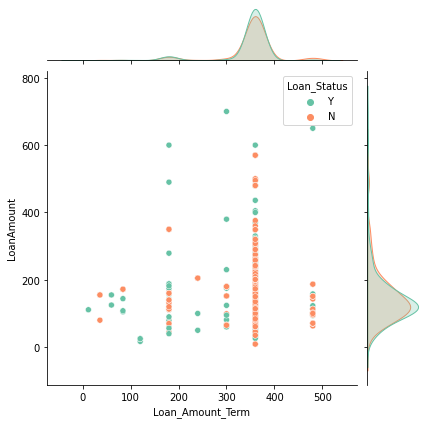

In [871]:
sb.jointplot(x_over['Loan_Amount_Term'],x_over['LoanAmount'],hue=y_over,palette='Set2')

#### OBSERVATIONS:
    - For high loan_Amount_term ,No Category of loan_Status is high.

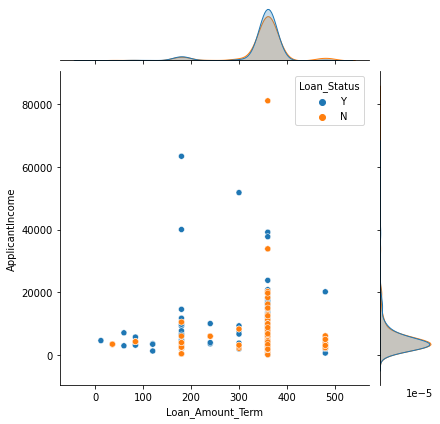

In [872]:
sb.jointplot(x_over['Loan_Amount_Term'],x_over['ApplicantIncome'],hue=y_over)

#### OBSERVATIONS:
    - high Applicant INcomes, has high probability to bleong in Yes Loan_Status.
    for high Amount Term has high No Loan_Status.

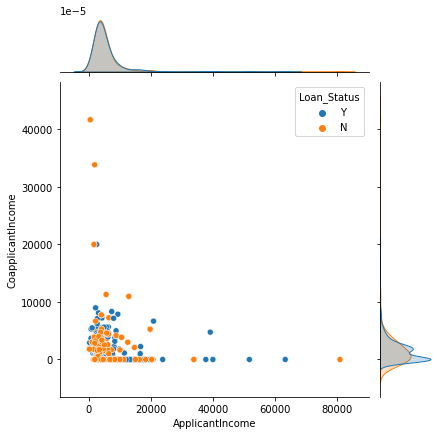

In [873]:
sb.jointplot(x_over['ApplicantIncome'],x_over['CoapplicantIncome'],hue=y_over)

#### Observations:
    - as the applicant income increases and low values of coappliants, more probability , it belongs to Yes.
    - as the coapplicants income increase, and low value of applicantsIncome, High probabiltiy to No Status.

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

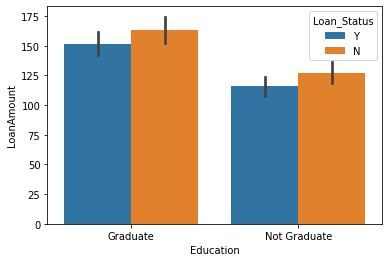

In [874]:
sb.barplot(x_over['Education'],x_over['LoanAmount'],hue=y_over)

#### OBSERVATIONS:
    - Graduate education category has higher average Loan_Amuont than not Graduate.
  

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

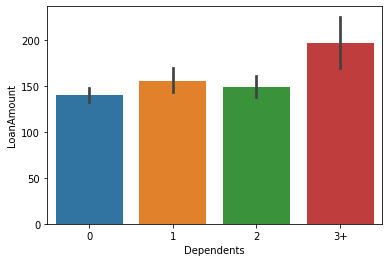

In [875]:
sb.barplot(x_over['Dependents'],x_over['LoanAmount'])

<AxesSubplot:xlabel='Dependents', ylabel='ApplicantIncome'>

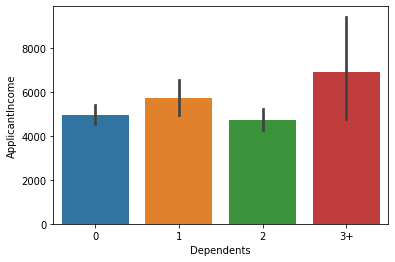

In [876]:
sb.barplot(x_over['Dependents'],x_over['ApplicantIncome'])

#### With Higher 3+ dpeendaant has average higher Loan_amount and applicant Income.

#### LABEL ENCODING, FILLING MISSING VALUES, FEATURE RE ENGINNERING

        - FILLING THE MISSING VALUES With mode for categorical Data and Median for Continous Features

In [877]:
(train.isnull()).sum(axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

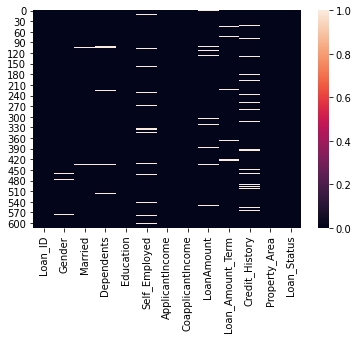

In [878]:
sb.heatmap(train.isnull())

In [879]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married']= train['Married'].fillna(train['Married'].mode()[0])
train['Dependents']= train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed']= train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['Credit_History']= train['Credit_History'].fillna(train['Credit_History'].mode()[0])
train['LoanAmount']= train['LoanAmount'].fillna(train['LoanAmount'].median())
train['Loan_Amount_Term']= train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())

In [880]:
(train.isnull()).sum(axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [881]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [882]:
category = [ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']

In [883]:
from sklearn.preprocessing import LabelEncoder

In [884]:
for i in category:
    train[i] = LabelEncoder().fit_transform(train[i])

In [885]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1


<AxesSubplot:>

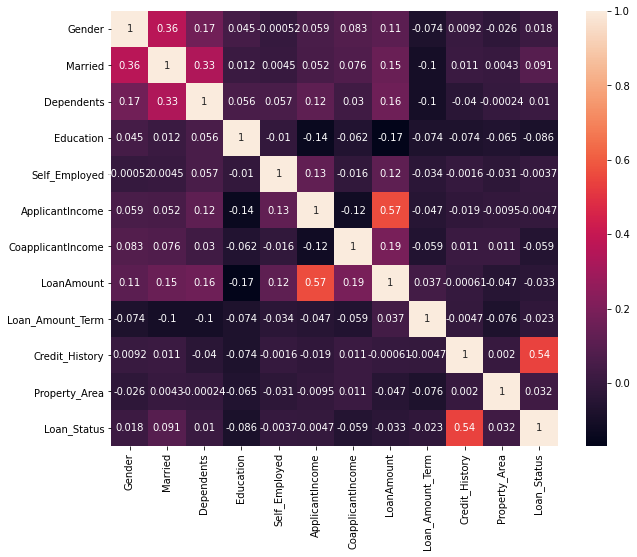

In [886]:
plt.figure(figsize=(10,8))
sb.heatmap(train.corr(),annot=True)

#### OBSERVATIONS:
    - Loan Status has highest correlation with Credit_History.
    - Multi collinearity present between features. due to which Naive bayes, KNN , Logistic Regression might get effected.

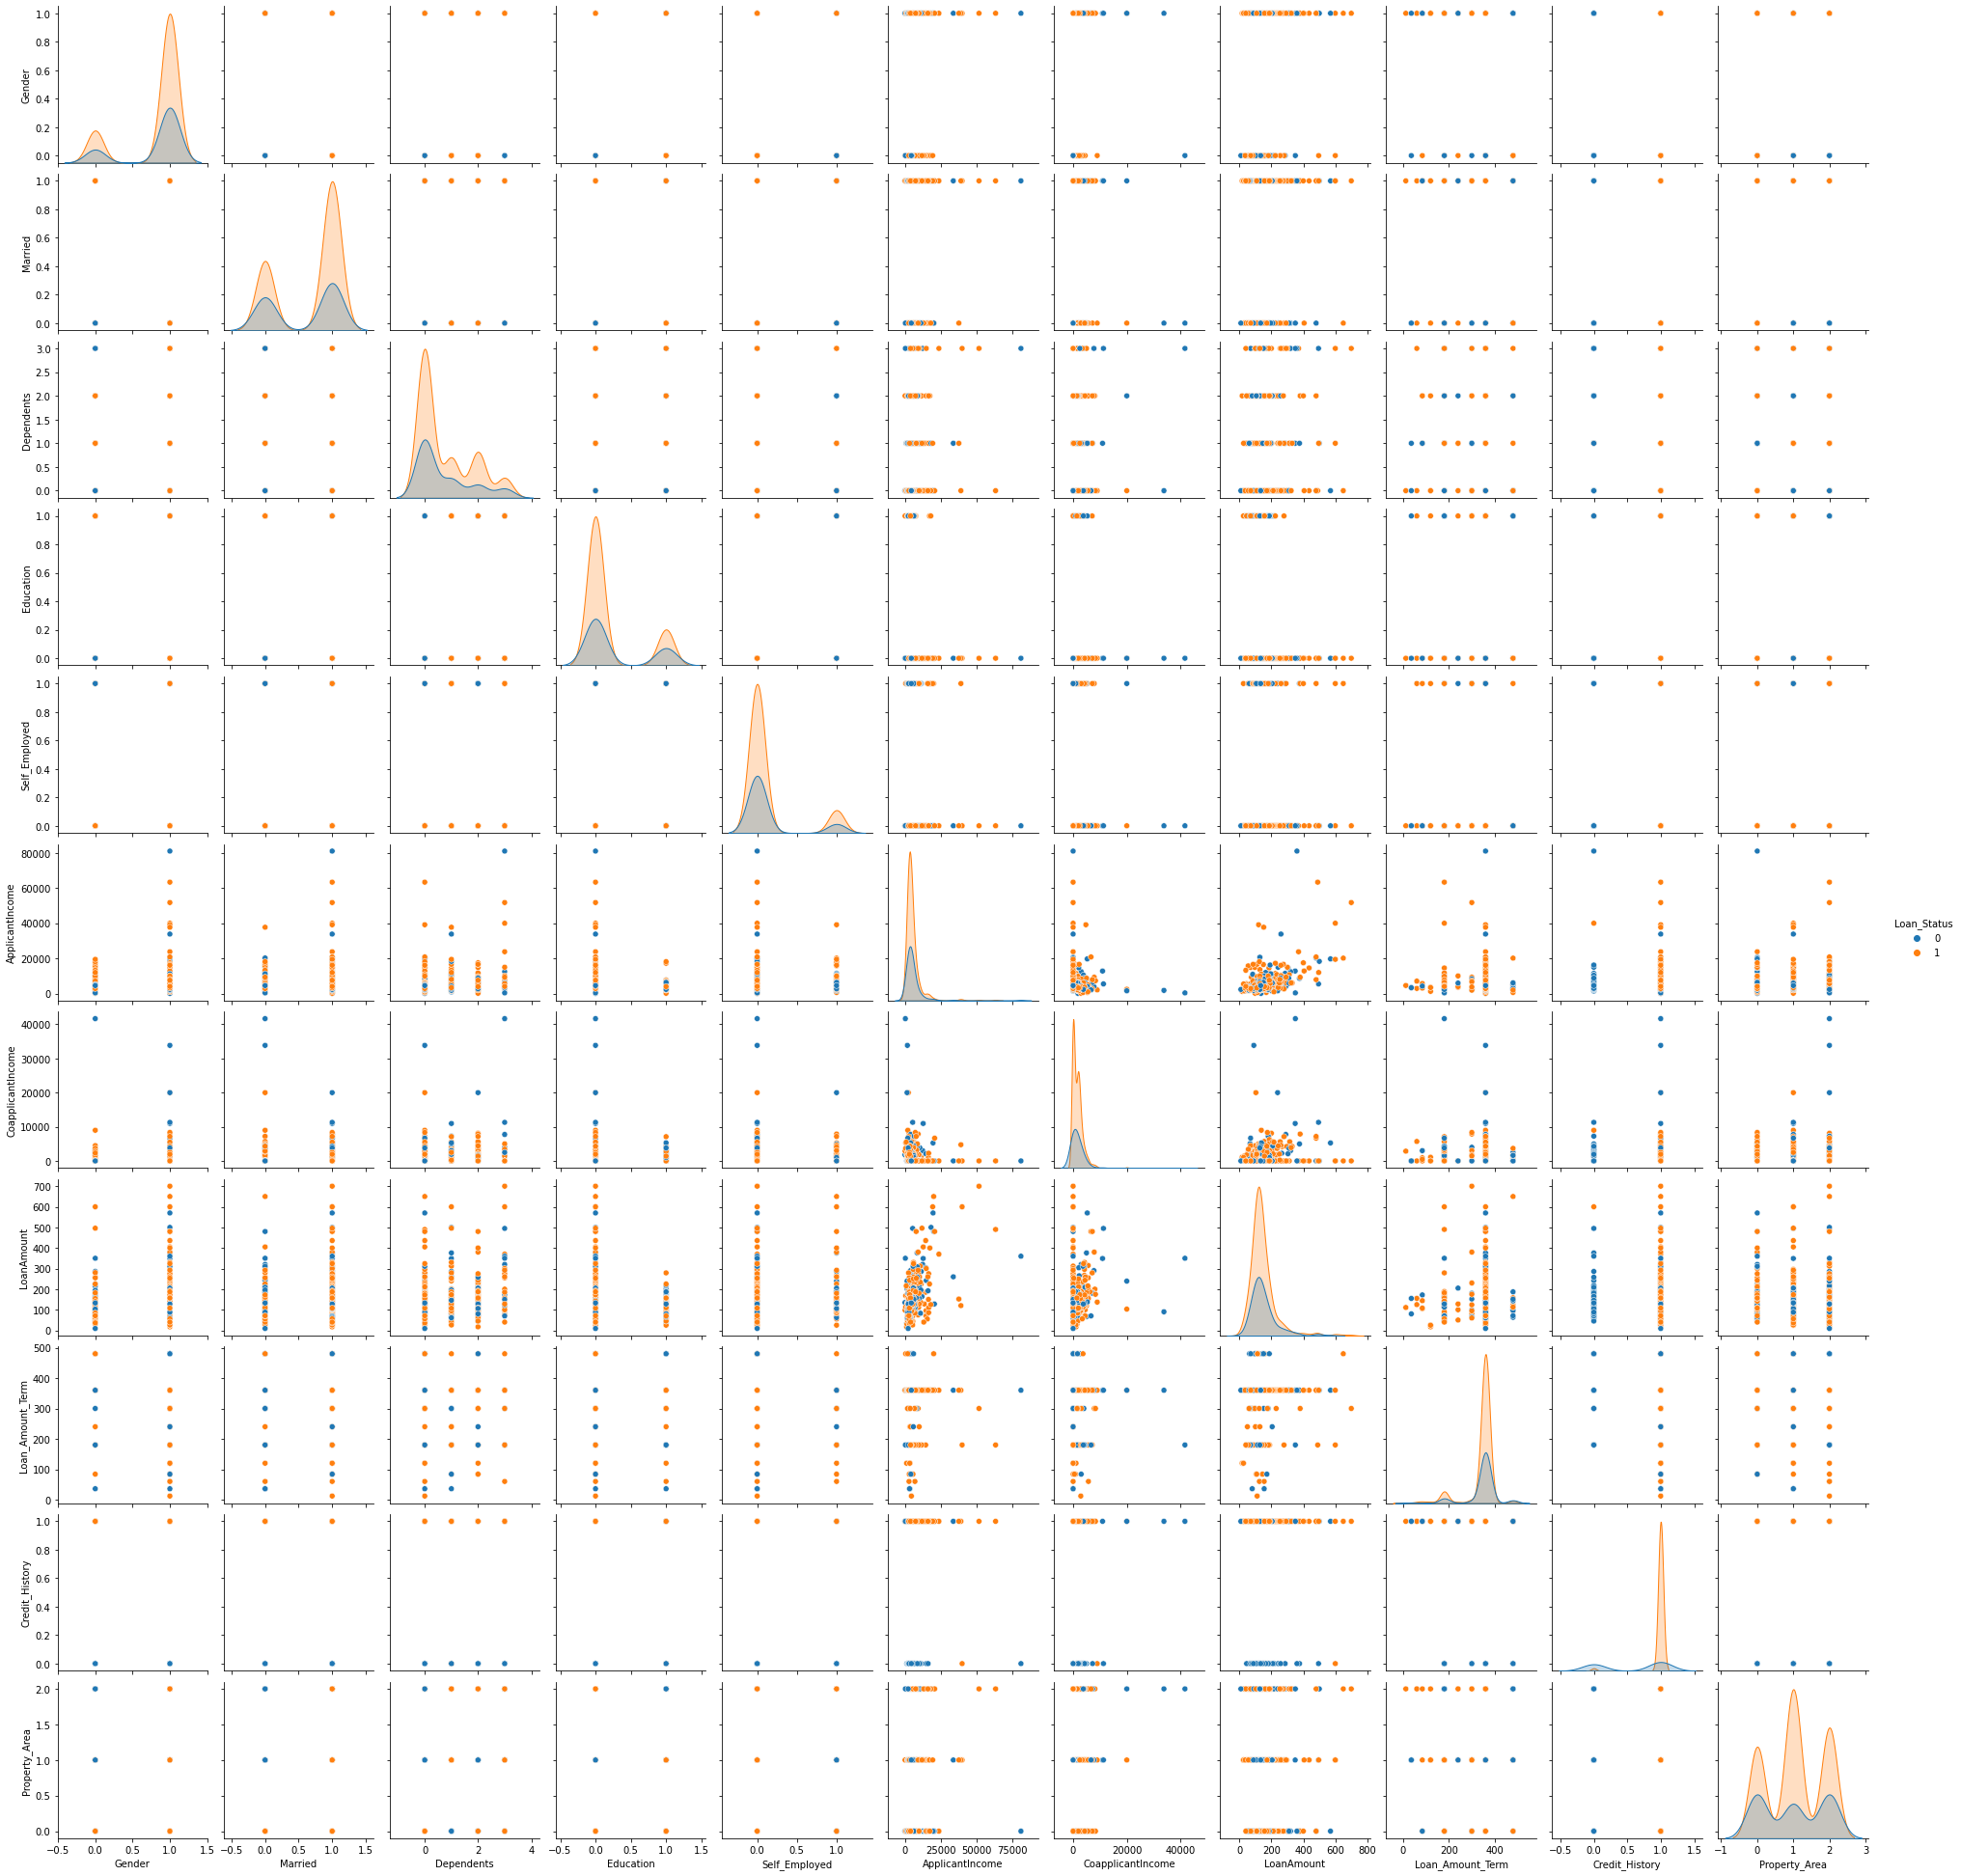

In [887]:
sb.pairplot(train,hue='Loan_Status')

#### DATA CLEANING: 
    - Outlier Detection
    - If outliers Present, Outlier Treatment with ZSCORE METHOD.
    - CHECK For Skewness, If Skewness present, Transformation of Data.
    - Standardizing/scaling the Data.

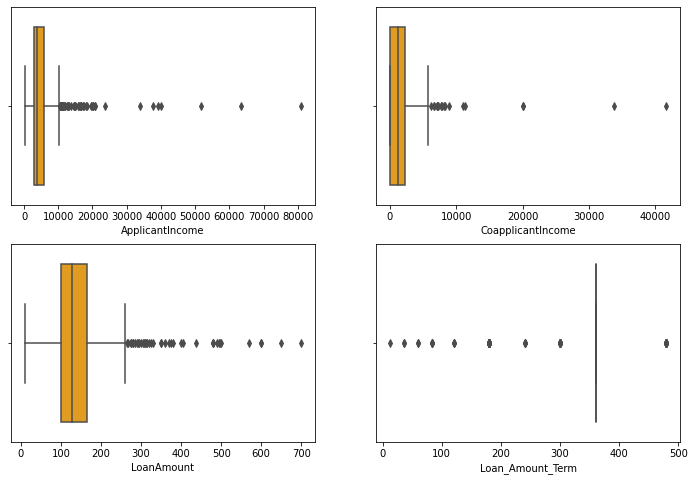

In [888]:
plt.figure(figsize=(12,8))
k =1
for i in column_cont:
    plt.subplot(2,2,k)
    sb.boxplot(train[i],color='orange')
    k = k+1

In [889]:
from scipy.stats import zscore


In [890]:
x = train.drop('Loan_ID',axis=1)

In [891]:
zscores  = np.abs(zscore(x))

In [892]:
len(np.where(zscores>3)[0])

41

In [893]:
x.shape

(614, 12)

In [894]:
x = x[(zscores<3).all(axis=1)]

In [895]:
x.shape

(577, 12)

#### LOSS of DAta observed 6%

In [896]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

#### Skewness present still in continous variables, loan_amount_term, loan_Amount, ApplicantIncome, Coapplicantincome.


#### USING POWER-TRANSFORM OF CONTNOUS FEATURES TO REDUCE SKEWNESS

In [897]:
from sklearn.preprocessing import PowerTransformer

In [898]:
column_cont

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [899]:
x[column_cont] = PowerTransformer().fit_transform(x[column_cont])

In [900]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.681780,-1.122446,0.000771,0.130788,1,2,1
1,1,1,1,0,0,0.234783,0.744117,0.000771,0.130788,1,0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,0.130788,1,2,1
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,0.130788,1,2,1
4,1,0,0,0,0,0.728848,-1.122446,0.238260,0.130788,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.587375,-1.122446,-1.293791,0.130788,1,0,1
610,1,1,3,0,0,0.035386,-1.122446,-2.332692,-2.562700,1,0,1
611,1,1,1,0,0,1.281658,0.173344,1.845015,0.130788,1,2,1
612,1,1,2,0,0,1.164426,-1.122446,0.976055,0.130788,1,2,1


In [901]:
y = x['Loan_Status']

In [902]:
x.drop(['Loan_Status'],axis=1,inplace=True)

In [903]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

#### SKEWNESS reduced .

### PCA ENGINEERING
    - understanding how many fetures needed to predict the Target Variable.

In [904]:
from sklearn.decomposition import PCA

In [905]:
pca = PCA()
pca.fit(x,y)

PCA()

In [906]:
pca.explained_variance_ratio_

array([0.24127789, 0.20059108, 0.16493944, 0.13982735, 0.09509484,
       0.05122925, 0.02862014, 0.02614485, 0.01930607, 0.01683509,
       0.016134  ])

<BarContainer object of 11 artists>

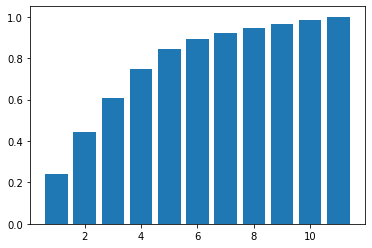

In [907]:
plt.bar(range(1,12),np.cumsum(pca.explained_variance_ratio_))

#### observation:
    AS WE SEE WE NEED ALL THE ELEMENTS FOR PREDICTION OF lOAN_STATUS, REDUCING FEATURES WILL RESULT IN CONSIDERABLE AMOUNT OF INFORMATION LOSS EFFECTING THE PERFORMANCE OF MODEL.

### DATA MODELING

In [908]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import scikitplot as skplt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,recall_score,precision_score

#### PERFORMING OVERSAMPLING OF DATA AS IMBALANCED CLASSES MIGHT CREATE BIASSNESS TOWARDS 1 CLASS

In [909]:
X_over, Y_over = SMOTE().fit_resample(x,y)

In [910]:
def random_state_func(model):
    randomstate = 0
    max_score = 0
    
    for i in range(1,50):
        x_train,x_test,y_train,y_test = train_test_split(X_over,Y_over,test_size=.30,random_state=i)
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        score = accuracy_score(y_test,pred)    
        if(score>max_score):
            max_score = score
            randomstate  = i
    return(randomstate)

#### DATA MODELING:
    - WE will use F1-Score apaprt from ROC_AUC SCORE for evaluating the  model as classes are imbalanced, we need to check if there is any biassness present for any TARGET CLASS, WE will also check precision Score and Recall_Score.

In [980]:
cv_scores = []
auc_roc_scores = []
acc_scores = []
f1_scores = []

In [981]:
def model_predict(model,randomstate):
    x_train,x_test,y_train,y_test = train_test_split(X_over,Y_over,test_size=.33,random_state=randomstate)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    pred_proba = model.predict_proba(x_test)[:,1]
    fpr,tpr,threshold = roc_curve(y_test,pred_proba)
    cv_score = np.mean(cross_val_score(model,X_over,Y_over,cv=10,scoring='accuracy'))
     
    print('------------',model,'--------------')
    print(' Accuracy Score         : ', accuracy_score(y_test,predictions))
    print('ROC AUC Score           : ', roc_auc_score(y_test,pred_proba))
    print('Cross Validation Score  : ',cv_score)
    print('F1 Score                :',f1_score(y_test,predictions))
    print('Precision Score                :',precision_score(y_test,predictions))
    print('Recall Score                :',recall_score(y_test,predictions))
   
    
    
    print(classification_report(y_test,predictions))
    acc_scores.append(accuracy_score(y_test,predictions))
    cv_scores.append(cv_score)
    auc_roc_scores.append(roc_auc_score(y_test,pred_proba))
    f1_scores.append(f1_score(y_test,predictions))
    
    plt.figure(figsize=(8,5))
    plt.plot(fpr,tpr)
    plt.ylabel('Sensitivity')
    plt.xlabel('1 - Specificity')
    leg = 'AUC SCORE:'+ str(roc_auc_score(y_test,pred_proba))
    plt.legend( [leg],loc= 10)
    
    
    plt.figure()
    skplt.metrics.plot_confusion_matrix(y_test,predictions)
    
    

#### LOGISTIC REGRESSION

------------ LogisticRegression() --------------
 Accuracy Score         :  0.7946768060836502
ROC AUC Score           :  0.8566465956461324
Cross Validation Score  :  0.782879746835443
F1 Score                : 0.8258064516129032
Precision Score                : 0.735632183908046
Recall Score                : 0.9411764705882353
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       127
           1       0.74      0.94      0.83       136

    accuracy                           0.79       263
   macro avg       0.82      0.79      0.79       263
weighted avg       0.82      0.79      0.79       263



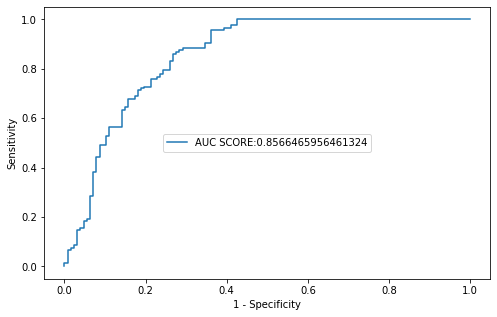

<Figure size 432x288 with 0 Axes>

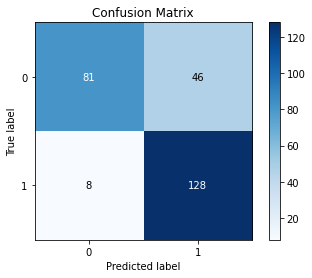

In [982]:
rs = random_state_func(LogisticRegression())
model_predict(LogisticRegression(),rs)

#### OBSERVATIONS
    - Precision score and Recall score has major difference showing biassness for 1 class. 
    - LOgistic Regression might get effecting with Multicollinearity.
    

#### SVC

------------ SVC(probability=True) --------------
 Accuracy Score         :  0.7984790874524715
ROC AUC Score           :  0.8595414543770263
Cross Validation Score  :  0.7816139240506329
F1 Score                : 0.8328075709779179
Precision Score                : 0.7292817679558011
Recall Score                : 0.9705882352941176
              precision    recall  f1-score   support

           0       0.95      0.61      0.75       127
           1       0.73      0.97      0.83       136

    accuracy                           0.80       263
   macro avg       0.84      0.79      0.79       263
weighted avg       0.84      0.80      0.79       263



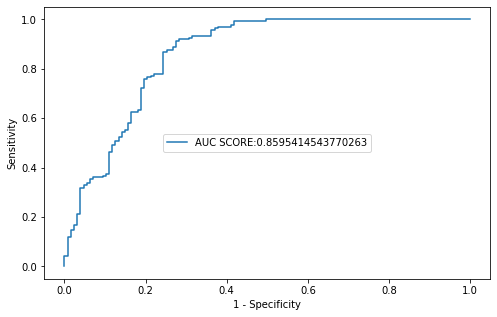

<Figure size 432x288 with 0 Axes>

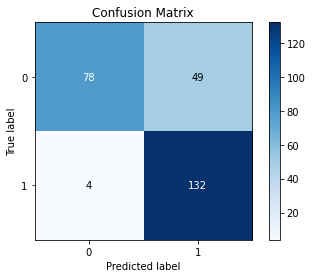

In [983]:
rs = random_state_func(SVC())
model_predict(SVC(probability=True),rs)

### NAIVE BAYES

In [984]:
from sklearn.naive_bayes import GaussianNB

------------ GaussianNB() --------------
 Accuracy Score         :  0.8250950570342205
ROC AUC Score           :  0.8745662734212353
Cross Validation Score  :  0.7665664556962024
F1 Score                : 0.8466666666666666
Precision Score                : 0.7514792899408284
Recall Score                : 0.9694656488549618
              precision    recall  f1-score   support

           0       0.96      0.68      0.80       132
           1       0.75      0.97      0.85       131

    accuracy                           0.83       263
   macro avg       0.85      0.83      0.82       263
weighted avg       0.85      0.83      0.82       263



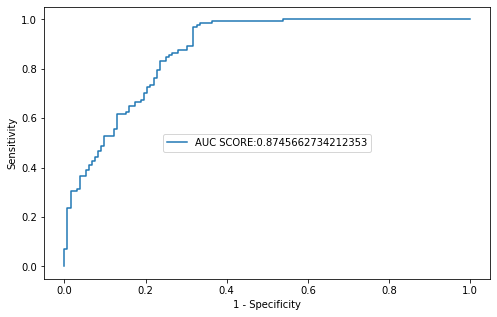

<Figure size 432x288 with 0 Axes>

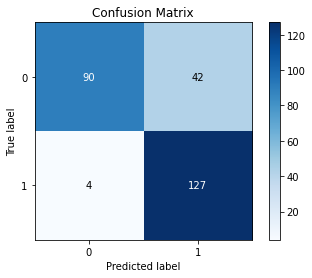

In [985]:
rs = random_state_func(GaussianNB())
model_predict(GaussianNB(),rs)

#### DECISION TREE

------------ DecisionTreeClassifier() --------------
 Accuracy Score         :  0.7832699619771863
ROC AUC Score           :  0.7833718912666281
Cross Validation Score  :  0.7625791139240506
F1 Score                : 0.7832699619771863
Precision Score                : 0.7923076923076923
Recall Score                : 0.7744360902255639
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       130
           1       0.79      0.77      0.78       133

    accuracy                           0.78       263
   macro avg       0.78      0.78      0.78       263
weighted avg       0.78      0.78      0.78       263



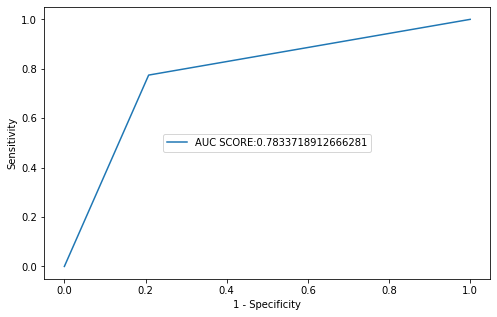

<Figure size 432x288 with 0 Axes>

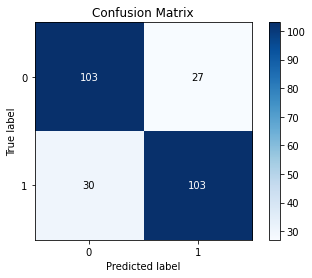

In [986]:
rs = random_state_func(DecisionTreeClassifier())
model_predict(DecisionTreeClassifier(),rs)

## ENSEMBLING TECHNIQUES

### RANDOM FOREST CLASSIFIER

------------ RandomForestClassifier() --------------
 Accuracy Score         :  0.8326996197718631
ROC AUC Score           :  0.900793191292265
Cross Validation Score  :  0.8256329113924051
F1 Score                : 0.8482758620689655
Precision Score                : 0.7987012987012987
Recall Score                : 0.9044117647058824
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       127
           1       0.80      0.90      0.85       136

    accuracy                           0.83       263
   macro avg       0.84      0.83      0.83       263
weighted avg       0.84      0.83      0.83       263



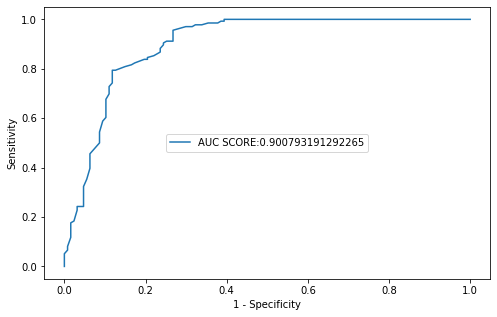

<Figure size 432x288 with 0 Axes>

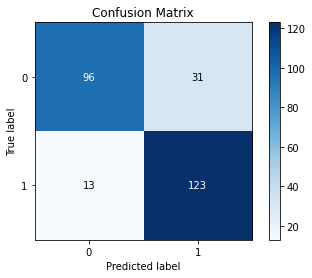

In [987]:
rs = random_state_func(RandomForestClassifier())
model_predict(RandomForestClassifier(),rs)

### XGBOOST CLASSIFIER

[15:58:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:58:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:58:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:58:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

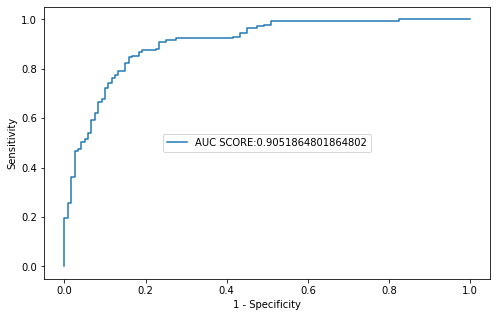

<Figure size 432x288 with 0 Axes>

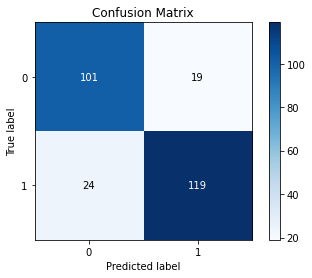

In [988]:
rs = random_state_func(XGBClassifier())
model_predict(XGBClassifier(),rs)

### LIGHT GBM CLASSIFER

------------ LGBMClassifier() --------------
 Accuracy Score         :  0.7984790874524715
ROC AUC Score           :  0.8758105604446503
Cross Validation Score  :  0.8042879746835443
F1 Score                : 0.8127208480565371
Precision Score                : 0.782312925170068
Recall Score                : 0.8455882352941176
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       127
           1       0.78      0.85      0.81       136

    accuracy                           0.80       263
   macro avg       0.80      0.80      0.80       263
weighted avg       0.80      0.80      0.80       263



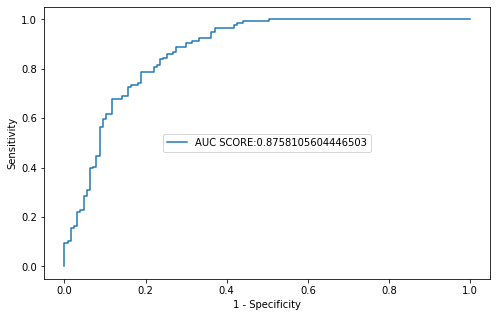

<Figure size 432x288 with 0 Axes>

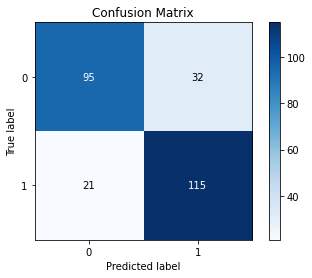

In [989]:
rs = random_state_func(LGBMClassifier())
model_predict(LGBMClassifier(),rs)

#### ADA BOOST CLASSIFER

------------ AdaBoostClassifier() --------------
 Accuracy Score         :  0.7870722433460076
ROC AUC Score           :  0.8547619047619047
Cross Validation Score  :  0.7627689873417722
F1 Score                : 0.7971014492753623
Precision Score                : 0.7189542483660131
Recall Score                : 0.8943089430894309
              precision    recall  f1-score   support

           0       0.88      0.69      0.78       140
           1       0.72      0.89      0.80       123

    accuracy                           0.79       263
   macro avg       0.80      0.79      0.79       263
weighted avg       0.81      0.79      0.79       263



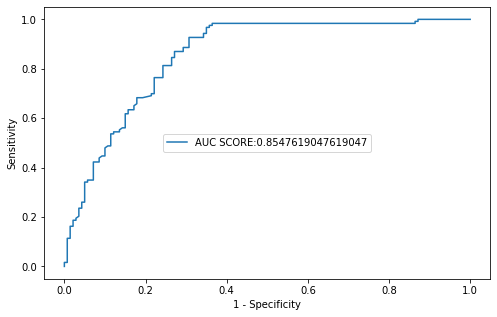

<Figure size 432x288 with 0 Axes>

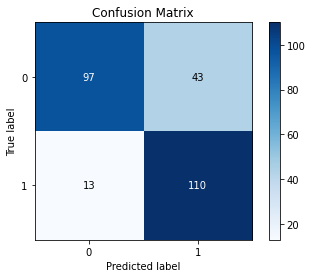

In [990]:
rs = random_state_func(AdaBoostClassifier())
model_predict(AdaBoostClassifier(),rs)

### GRADIENT BOOSTING CLASSIFER

------------ GradientBoostingClassifier() --------------
 Accuracy Score         :  0.8060836501901141
ROC AUC Score           :  0.8688989127920425
Cross Validation Score  :  0.7853955696202531
F1 Score                : 0.8158844765342962
Precision Score                : 0.7793103448275862
Recall Score                : 0.8560606060606061
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       131
           1       0.78      0.86      0.82       132

    accuracy                           0.81       263
   macro avg       0.81      0.81      0.81       263
weighted avg       0.81      0.81      0.81       263



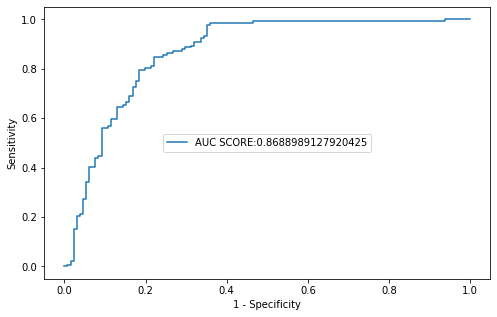

<Figure size 432x288 with 0 Axes>

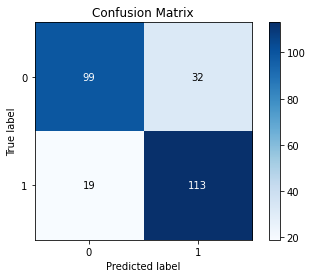

In [991]:
rs = random_state_func(GradientBoostingClassifier())
model_predict(GradientBoostingClassifier(),rs)

In [992]:
error = []
for i in range(0,9):
    error.append(np.abs(auc_roc_scores[i] - cv_scores[i]))
    

In [993]:
table_dict = {
    'ROC AUC SCORE: ':auc_roc_scores,
    'ACCURACY SCORE': acc_scores,
    'CV SCORE': cv_scores,
    'F1 SCORE': f1_scores,
    'Bias/ Error': error
}

In [994]:
table_model = pd.DataFrame(table_dict,index=['LReg','SVC','NAIVEBAYES','DTC','RF','XGBC','LightGBMC','ADABoost','GB'])

In [995]:
table_model

,ROC AUC SCORE:,ACCURACY SCORE,CV SCORE,F1 SCORE,Bias/ Error
LReg,0.856647,0.794677,0.782880,0.825806,0.073767
SVC,0.859541,0.798479,0.781614,0.832808,0.077928
NAIVEBAYES,0.874566,0.825095,0.766566,0.846667,0.108000
DTC,0.783372,0.783270,0.762579,0.783270,0.020793
RF,0.900793,0.832700,0.825633,0.848276,0.075160
XGBC,0.905186,0.836502,0.791677,0.846975,0.113509
LightGBMC,0.875811,0.798479,0.804288,0.812721,0.071523
ADABoost,0.854762,0.787072,0.762769,0.797101,0.091993
GB,0.868899,0.806084,0.785396,0.815884,0.083503


#### WE CHOOSE THE MODEL WITH LEAST BIAS: 
    - Model with least Error is DTC then RF, but DTC has lowest accuracy,f1-scores. Choosing the next best least error model : RANDOM FOREST/ LightGBM
    

#### HYPERPARAMETER TUNING with GRidSearchCV RANDOM FOREST 

In [1063]:
params = {
    'n_estimators': [100,150,120,200],
    'criterion': ['gini','entropy'],
    'max_depth': [None,5,10,15],
    'min_samples_split': [1,2,3],
    'min_samples_leaf': [10,50,70,80,100],
    'max_leaf_nodes':[None,10,50,70,80,100],
   
    'bootstrap': [True, False]
    
}
rf = RandomForestClassifier()

In [1064]:
grid = RandomizedSearchCV(rf,params,cv=5,n_iter=50,scoring='accuracy',verbose=2)

In [1066]:
x_train,x_test,y_train,y_test = train_test_split(X_over,Y_over,test_size=.30,random_state=12)

In [1067]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_leaf_nodes=None, min_samples_leaf=100, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=80, min_samples_split=2, n_estimators=120; total time=   0.1s
[C

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15],
                                        'max_leaf_nodes': [None, 10, 50, 70, 80,
                                                           100],
                                        'min_samples_leaf': [10, 50, 70, 80,
                                                             100],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [100, 150, 120, 200]},
                   scoring='accuracy', verbose=2)

In [1068]:
grid.best_score_,grid.best_estimator_

(0.7648809523809523,
 RandomForestClassifier(bootstrap=False, criterion='entropy', max_leaf_nodes=70,
                        min_samples_leaf=10, n_estimators=120))

------------ RandomForestClassifier(bootstrap=False, criterion='entropy', max_leaf_nodes=70,
                       min_samples_leaf=10, n_estimators=120) --------------
 Accuracy Score         :  0.8493723849372385
ROC AUC Score           :  0.9028228652081862
Cross Validation Score  :  0.7929746835443038
F1 Score                : 0.8723404255319149
Precision Score                : 0.8092105263157895
Recall Score                : 0.9461538461538461
              precision    recall  f1-score   support

           0       0.92      0.73      0.82       109
           1       0.81      0.95      0.87       130

    accuracy                           0.85       239
   macro avg       0.86      0.84      0.84       239
weighted avg       0.86      0.85      0.85       239



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

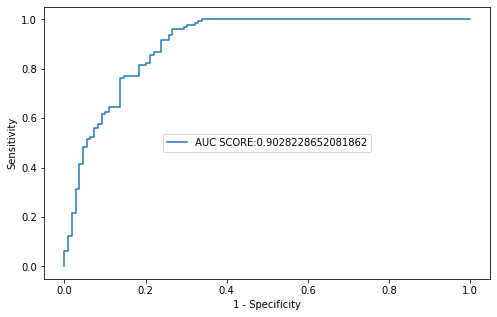

<Figure size 432x288 with 0 Axes>

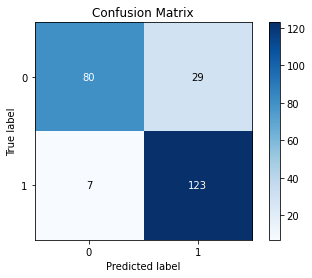

In [1069]:
    
    model =   RandomForestClassifier(bootstrap=False, criterion='entropy', max_leaf_nodes=70,
                        min_samples_leaf=10, n_estimators=120)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    pred_proba = model.predict_proba(x_test)[:,1]
    fpr,tpr,threshold = roc_curve(y_test,pred_proba)
    cv_score = np.mean(cross_val_score(model,X_over,Y_over,cv=10,scoring='accuracy'))
     
    print('------------',model,'--------------')
    print(' Accuracy Score         : ', accuracy_score(y_test,predictions))
    print('ROC AUC Score           : ', roc_auc_score(y_test,pred_proba))
    print('Cross Validation Score  : ',cv_score)
    print('F1 Score                :',f1_score(y_test,predictions))
    print('Precision Score                :',precision_score(y_test,predictions))
    print('Recall Score                :',recall_score(y_test,predictions))
   
    
    
    print(classification_report(y_test,predictions))
    acc_scores.append(accuracy_score(y_test,predictions))
    cv_scores.append(cv_score)
    auc_roc_scores.append(roc_auc_score(y_test,pred_proba))
    f1_scores.append(f1_score(y_test,predictions))
    
    plt.figure(figsize=(8,5))
    plt.plot(fpr,tpr)
    plt.ylabel('Sensitivity')
    plt.xlabel('1 - Specificity')
    leg = 'AUC SCORE:'+ str(roc_auc_score(y_test,pred_proba))
    plt.legend( [leg],loc= 10)
    
    
    plt.figure()
    skplt.metrics.plot_confusion_matrix(y_test,predictions)
    
    

#### EVALUATING THE FINAL TUNED MODEL:  RANDOM FOREST

------------RANDOM FOREST CLASSIFIER MODEL-------------
 Accuracy Score         :  0.8535564853556485
ROC AUC Score           :  0.9066337332392378
Cross Validation Score  :  0.7929905063291139
F1 Score                : 0.8745519713261649
Precision Score                : 0.8187919463087249
Recall Score                : 0.9384615384615385
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       109
           1       0.82      0.94      0.87       130

    accuracy                           0.85       239
   macro avg       0.86      0.85      0.85       239
weighted avg       0.86      0.85      0.85       239



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

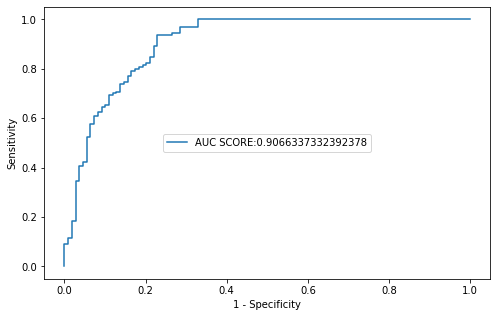

<Figure size 432x288 with 0 Axes>

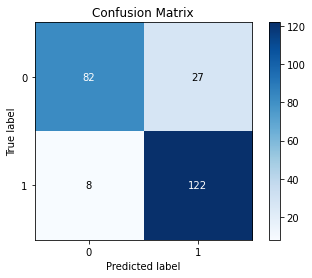

In [1079]:
    
    model =   RandomForestClassifier(bootstrap=False, criterion='entropy', 
                 max_leaf_nodes=70,min_samples_leaf=10, n_estimators=120)
    
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    pred_proba = model.predict_proba(x_test)[:,1]
    fpr,tpr,threshold = roc_curve(y_test,pred_proba)
    cv_score = np.mean(cross_val_score(model,X_over,Y_over,cv=10,scoring='accuracy'))
     
    print('------------RANDOM FOREST CLASSIFIER MODEL-------------')
    print(' Accuracy Score         : ', accuracy_score(y_test,predictions))
    print('ROC AUC Score           : ', roc_auc_score(y_test,pred_proba))
    print('Cross Validation Score  : ',cv_score)
    print('F1 Score                :',f1_score(y_test,predictions))
    print('Precision Score                :',precision_score(y_test,predictions))
    print('Recall Score                :',recall_score(y_test,predictions))
   
    
    
    print(classification_report(y_test,predictions))
    
    
    plt.figure(figsize=(8,5))
    plt.plot(fpr,tpr)
    plt.ylabel('Sensitivity')
    plt.xlabel('1 - Specificity')
    leg = 'AUC SCORE:'+ str(roc_auc_score(y_test,pred_proba))
    plt.legend( [leg],loc= 10)
    
    
    plt.figure()
    skplt.metrics.plot_confusion_matrix(y_test,predictions)
    
    

#### CONCLUSION 
    - Random Forest after hyperparameter tuning giving an accuracy upto .85% with ROC AUC Score of .90%.
    - Little biassness is observed as Precision is higher for for loan_status no and Recall Score is higher for Yes Score.
    -After After tuning, Rf has least sum of FalsePositive and FalseNegative as you can see in Confusion matrix.

#### SAVING AND LAODING THE MODEL:


In [1080]:
import joblib as jb

In [1082]:
jb.dump(model,'loan_pred_rf.pk1')

['loan_pred_rf.pk1']

In [1084]:
jb.load('loan_pred_rf.pk1')

RandomForestClassifier(bootstrap=False, criterion='entropy', max_leaf_nodes=70,
                       min_samples_leaf=10, n_estimators=120)